In [2591]:
import pandas as pd

In [2592]:
co = pd.read_csv('2021_CO_1g.xlsx - 2021_CO_1g.csv', low_memory=False)

In [2593]:
no = pd.read_csv('2021_NO2_1g.xlsx - 2021_NO2_1g.csv', low_memory=False)

In [2594]:
pm = pd.read_csv('2021_PM10_1g.xlsx - 2021_PM10_1g.csv', low_memory=False)

In [2595]:
pm.drop(
    labels=[0, 1, 2, 3, 4],
    axis=0,
    inplace=True
)
no.drop(
    labels=[0, 1, 2, 3, 4],
    axis=0,
    inplace=True
)
co.drop(
    labels=[0, 1, 2, 3, 4],
    axis=0,
    inplace=True
)

In [2596]:
pm = pm.iloc[:, [ 0, 114, 115, 116, 117, 118, 122]]

In [2597]:
no = no.iloc[:, [ 0, 89, 90, 91, 92, 93, 96]]

In [2598]:
co = co.iloc[:, [0, 38, 39, 40, 41, 44]]

In [2599]:
co.columns = [
    "data",
    "PmGdaLeczkow",
    "PmGdaPowWars",
    "PmGdaWyzwole",
    "PmGdyPorebsk",
    "PmSopBiPlowoc"
]

In [2600]:
co.insert(5, "PmGdySzafran", -1)

In [2601]:
pm = pm.stack().str.replace(',','.').unstack()
co = co.stack().str.replace(',','.').unstack()
no = no.stack().str.replace(',','.').unstack()

In [2602]:
no.columns = [
    "data",
    "PmGdaLeczkow",
    "PmGdaPowWars",
    "PmGdaWyzwole",
    "PmGdyPorebsk",
    "PmGdySzafran",
    "PmSopBiPlowoc"
]

In [2603]:
pm.columns = [
    "data",
    "PmGdaLeczkow",
    "PmGdaPowWars",
    "PmGdaWyzwole",
    "PmGdyPorebsk",
    "PmGdySzafran",
    "PmSopBiPlowoc"
]

In [2604]:
pm.fillna({
    'PmGdaLeczkow': 0,
    'PmGdaPowWars': 0,
    'PmGdaWyzwole': 0,
    'PmGdyPorebsk': 0,
    'PmGdySzafran': 0,
    'PmSopBiPlowoc': 0},
    inplace=True)

no.fillna({
    'PmGdaLeczkow': 0,
    'PmGdaPowWars': 0,
    'PmGdaWyzwole': 0,
    'PmGdyPorebsk': 0,
    'PmGdySzafran': 0,
    'PmSopBiPlowoc': 0},
    inplace=True)

co.fillna({
    'PmGdaLeczkow': 0,
    'PmGdaPowWars': 0,
    'PmGdaWyzwole': 0,
    'PmGdyPorebsk': 0,
    'PmGdySzafran': 0,
    'PmSopBiPlowoc': 0},
    inplace=True)

In [2605]:
pm.to_csv('data_pm.csv', decimal='.')
co.to_csv('data_co.csv', decimal='.')
no.to_csv('data_no.csv', decimal='.')

In [2606]:
sty = pd.read_csv('01_2021.csv', low_memory=False)
lut = pd.read_csv('02_2021.csv', low_memory=False)
mar = pd.read_csv('03_2021.csv', low_memory=False)
kwi = pd.read_csv('04_2021.csv', low_memory=False)
maj = pd.read_csv('05_2021.csv', low_memory=False)
cze = pd.read_csv('06_2021.csv', low_memory=False)
lip = pd.read_csv('07_2021.csv', low_memory=False)
sie = pd.read_csv('08_2021.csv', low_memory=False)
wrz = pd.read_csv('09_2021.csv', low_memory=False)
paz = pd.read_csv('10_2021.csv', low_memory=False)
lis = pd.read_csv('11_2021.csv', low_memory=False)
gru = pd.read_csv('12_2021.csv', low_memory=False)

In [2607]:
lut.head()

,Year,Month,Day,Hour,Temp,Destination,Wind,Clouds
0,2021,2,1,6,-6.8,C,0,5
1,2021,2,1,12,-1.5,SSE,1,7
2,2021,2,1,18,-4.7,SE,3,7
3,2021,2,2,6,-4.3,S,3,7
4,2021,2,2,12,-2.3,WSW,3,8


In [2608]:
pogoda = pd.concat(
    [sty, lut, mar, kwi, maj, cze, lip, sie, wrz, paz, lis, gru],
    axis=0,
    join='inner',
    ignore_index=True)

In [2609]:
co_6 = co[(co.index - 4) % 6 == 0]
co_6 = co_6.reset_index(drop=True)
co_6 = co_6[(co_6.index + 1) % 4 != 0]
co_6 = co_6.reset_index(drop=True)

no_6 = no[(no.index - 4) % 6 == 0]
no_6 = no_6.reset_index(drop=True)
no_6 = no_6[(no_6.index + 1) % 4 != 0]
no_6 = no_6.reset_index(drop=True)

pm_6 = pm[(pm.index - 4) % 6 == 0]
pm_6 = pm_6.reset_index(drop=True)
pm_6 = pm_6[(pm_6.index + 1) % 4 != 0]
pm_6 = pm_6.reset_index(drop=True)

In [2610]:
pogoda.drop(
    labels=['Year', 'Month', 'Day', 'Hour', 'Destination'],
    axis=1,
    inplace=True
)

In [2611]:
pogoda_co = pd.merge(co_6, pogoda, left_index=True, right_index=True)


In [2612]:
pogoda_no = pd.merge(no_6, pogoda, left_index=True, right_index=True)

In [2613]:
pogoda_pm = pd.merge(pm_6, pogoda, left_index=True, right_index=True)

In [2614]:
pogoda_co.drop(
    labels=['data', 'PmGdySzafran'],
    axis=1,
    inplace=True
)

pogoda_no.drop(
    labels=['data'],
    axis=1,
    inplace=True
)

pogoda_pm.drop(
    labels=['data'],
    axis=1,
    inplace=True
)

In [2615]:
pogoda_co.head()

,PmGdaLeczkow,PmGdaPowWars,PmGdaWyzwole,PmGdyPorebsk,PmSopBiPlowoc,Temp,Wind,Clouds
0,0.482925,0.371925,0.377579,0.490193,0.429015,-3.1,2,8
1,0.454763,0.343756,0.393116,0.528211,0.397535,-2.4,2,8
2,0.478624,0.402133,0.403917,0.664534,0.440129,-1.8,1,8
3,0.586041,0.537086,0.32178,0.613455,0.54762,-1.7,1,7
4,0.614893,0.542558,0.580361,0.515825,0.555974,0.8,3,7


In [2616]:
pogoda_co['avg_co'] = pogoda_co.loc[:, ['PmGdaLeczkow', 'PmGdaPowWars', 'PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc']].astype(float).mean(axis=1)

In [2617]:
pogoda_no['avg_no'] = pogoda_no.loc[:, ['PmGdaLeczkow', 'PmGdaPowWars', 'PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc']].astype(float).mean(axis=1)

In [2618]:
pogoda_pm['avg_pm'] = pogoda_pm.loc[:, ['PmGdaLeczkow', 'PmGdaPowWars', 'PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc']].astype(float).mean(axis=1)

In [2619]:
pogoda_pm.drop(
    labels=['PmGdaLeczkow', 'PmGdaPowWars', 'PmGdySzafran','PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc'],
    axis=1,
    inplace=True
)
pogoda_co.drop(
    labels=['PmGdaLeczkow', 'PmGdaPowWars', 'PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc'],
    axis=1,
    inplace=True
)
pogoda_no.drop(
    labels=['PmGdaLeczkow','PmGdySzafran', 'PmGdaPowWars', 'PmGdaWyzwole', 'PmGdyPorebsk', 'PmSopBiPlowoc'],
    axis=1,
    inplace=True
)

In [2620]:
from matplotlib import pyplot as plt
import numpy as np


In [2621]:
pogoda_co.astype(float).corr()

,Temp,Wind,Clouds,avg_co
Temp,1.000000,0.068518,-0.245823,-0.504231
Wind,0.068518,1.000000,0.078293,-0.349225
Clouds,-0.245823,0.078293,1.000000,0.060324
avg_co,-0.504231,-0.349225,0.060324,1.000000


In [2622]:
pogoda_pm.astype(float).corr()

,Temp,Wind,Clouds,avg_pm
Temp,1.000000,0.068518,-0.245823,-0.168959
Wind,0.068518,1.000000,0.078293,-0.285187
Clouds,-0.245823,0.078293,1.000000,-0.087544
avg_pm,-0.168959,-0.285187,-0.087544,1.000000


In [2623]:
pogoda_no.astype(float).corr()

,Temp,Wind,Clouds,avg_no
Temp,1.000000,0.068518,-0.245823,-0.319569
Wind,0.068518,1.000000,0.078293,-0.446235
Clouds,-0.245823,0.078293,1.000000,-0.063305
avg_no,-0.319569,-0.446235,-0.063305,1.000000


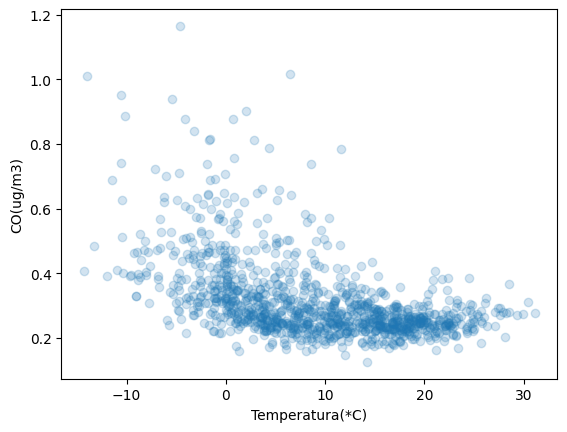

In [2624]:

plt.scatter(pogoda_co['Temp'].astype(float), pogoda_co['avg_co'].astype(float), alpha=0.2)
plt.xlabel('Temperatura(*C)')
plt.ylabel('CO(ug/m3)')
plt.show()

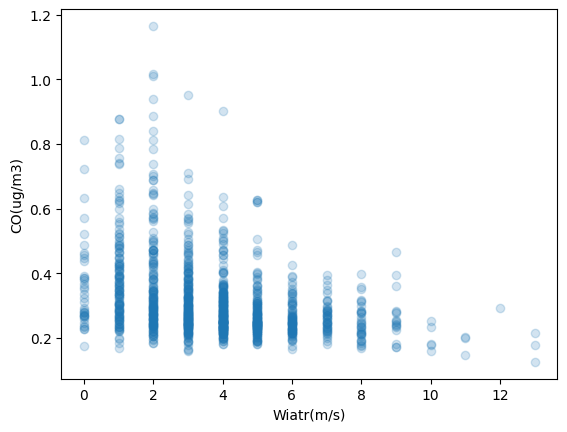

In [2625]:
plt.scatter(pogoda_co['Wind'].astype(float), pogoda_co['avg_co'].astype(float), alpha=0.2)
plt.xlabel('Wiatr(m/s)')
plt.ylabel('CO(ug/m3)')
plt.show()

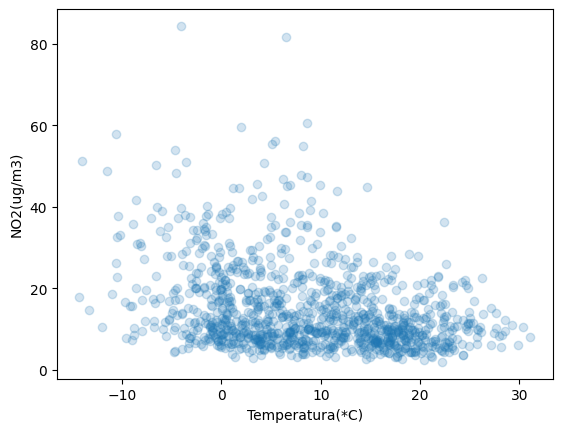

In [2626]:
plt.scatter(pogoda_no['Temp'].astype(float), pogoda_no['avg_no'].astype(float), alpha=0.2)
plt.xlabel('Temperatura(*C)')
plt.ylabel('NO2(ug/m3)')
plt.show()

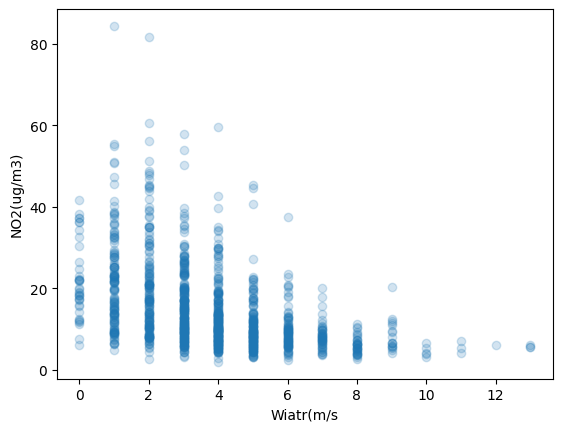

In [2627]:
plt.scatter(pogoda_no['Wind'].astype(float), pogoda_no['avg_no'].astype(float), alpha=0.2)
plt.xlabel('Wiatr(m/s')
plt.ylabel('NO2(ug/m3)')
plt.show()

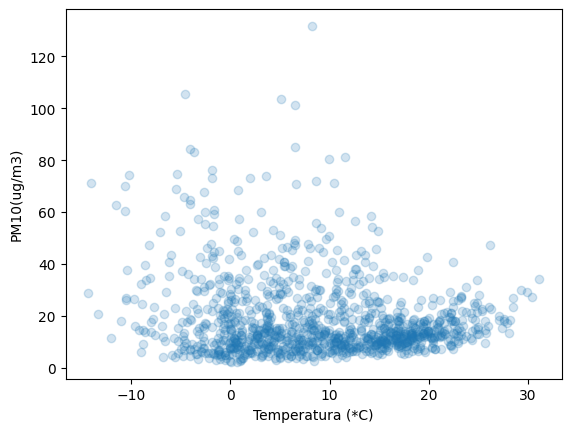

In [2628]:
plt.scatter(pogoda_pm['Temp'].astype(float), pogoda_pm['avg_pm'].astype(float), alpha=0.2)
plt.xlabel('Temperatura (*C)')
plt.ylabel('PM10(ug/m3)')
plt.show()

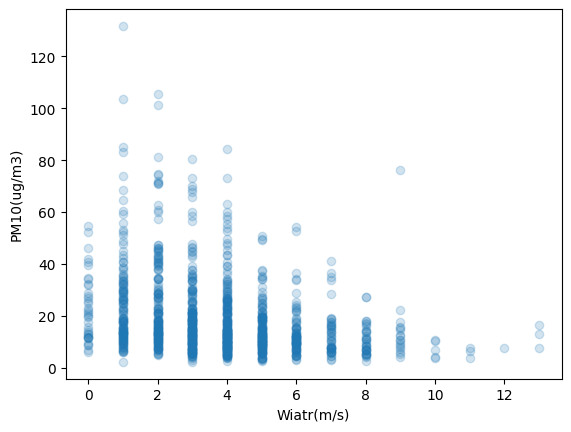

In [2629]:
plt.scatter(pogoda_pm['Wind'].astype(float), pogoda_pm['avg_pm'].astype(float), alpha=0.2)
plt.xlabel('Wiatr(m/s)')
plt.ylabel('PM10(ug/m3)')
plt.show()